# Deliverable 2 (Part 1): EDA and Ground Truth Preprocessing

This notebook prepares the final dataset for machine learning. Its key functions are:

1.  **Load Datasets**: Imports both the main feature dataset (`ma_secondary_dataset.csv`) and the ground truth M&A events (`real_ma_events.csv`).
2.  **Merge & Label**: Creates a new, reliable `real_target` column by labeling filings that occurred within one year prior to an actual, historical M&A event.
3.  **Exploratory Data Analysis (EDA)**: Conducts a detailed analysis comparing the features of 'positive' (pre-M&A) filings versus 'negative' filings to find predictive patterns.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('data/ma_secondary_dataset.csv')
    df['filing_date'] = pd.to_datetime(df['filing_date'])
    print("Main feature dataset loaded successfully!")
    print(f"Dataset contains {len(df)} rows.")
except FileNotFoundError:
    print("FATAL ERROR: 'data/ma_secondary_dataset.csv' not found. Please run Deliverable 1 first.")

df.head()

Main feature dataset loaded successfully!
Dataset contains 2758 rows.


,cik,filing_form,filing_date,ma_mentions_in_filing,ma_sentiment_in_filing,company_current_ratio,company_debt_to_equity,heuristic_ma_score
0,320193,10-Q,2025-08-01,3,0.7646,0.867992,4.035622,0.380931
1,320193,8-K,2025-07-31,0,0.0000,0.867992,4.035622,0.065099
2,320193,8-K,2025-07-25,0,0.0000,0.867992,4.035622,0.065099
3,320193,8-K,2025-07-09,0,0.0000,0.867992,4.035622,0.065099
4,320193,8-K,2025-05-12,0,0.0000,0.867992,4.035622,0.065099


## 1. Merge & Label with Ground Truth Data

In [ ]:
try:
    events_df = pd.read_csv('data/real_ma_events.csv')
    events_df['event_date'] = pd.to_datetime(events_df['event_date'])
    print(f"Loaded {len(events_df)} real M&A events to use for labeling.")

    df['real_target'] = 0


    for index, event in events_df.iterrows():
        cik = event['cik']
        event_date = event['event_date']
        one_year_prior = event_date - pd.Timedelta(days=365)
        
        positive_indices = df[
            (df['cik'] == cik) &
            (df['filing_date'] >= one_year_prior) &
            (df['filing_date'] < event_date)
        ].index
        
        if not positive_indices.empty:
            print(f"Labeling {len(positive_indices)} filings as positive for CIK {cik} before {event_date.date()}")
            df.loc[positive_indices, 'real_target'] = 1

    print("\nDistribution of the new 'real_target' variable:")
    print(df['real_target'].value_counts())

except FileNotFoundError:
    print("Warning: 'data/real_ma_events.csv' not found. Skipping ground truth labeling.")
    df['real_target'] = 0

Loaded 200 real M&A events to use for labeling.
Labeling 1 filings as positive for CIK 1045810 before 2019-03-11
Labeling 1 filings as positive for CIK 1318605 before 2019-05-08
Labeling 4 filings as positive for CIK 1730168 before 2023-11-22
Labeling 4 filings as positive for CIK 1730168 before 2023-08-16
Labeling 1 filings as positive for CIK 1730168 before 2021-01-19
Labeling 1 filings as positive for CIK 1730168 before 2019-11-04
Labeling 1 filings as positive for CIK 1403161 before 2016-05-10
Labeling 4 filings as positive for CIK 34088 before 2023-10-11
Labeling 3 filings as positive for CIK 1141391 before 2022-11-14
Labeling 4 filings as positive for CIK 354950 before 2024-05-09
Labeling 4 filings as positive for CIK 354950 before 2024-03-28
Labeling 1 filings as positive for CIK 354950 before 2020-11-18
Labeling 1 filings as positive for CIK 1551152 before 2019-11-26
Labeling 1 filings as positive for CIK 1551152 before 2019-11-13
Labeling 4 filings as positive for CIK 93410 be

## 2. Proper Exploratory Data Analysis (EDA)

Now that we have a reliable target variable (`real_target`), we can explore the differences between filings that preceded an M&A event versus normal filings.

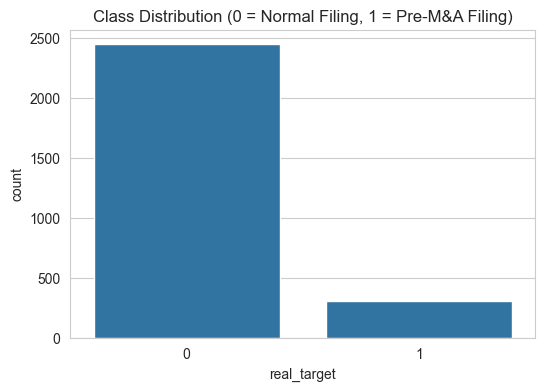

Insight: The dataset is highly imbalanced, which is expected. M&A events are rare.


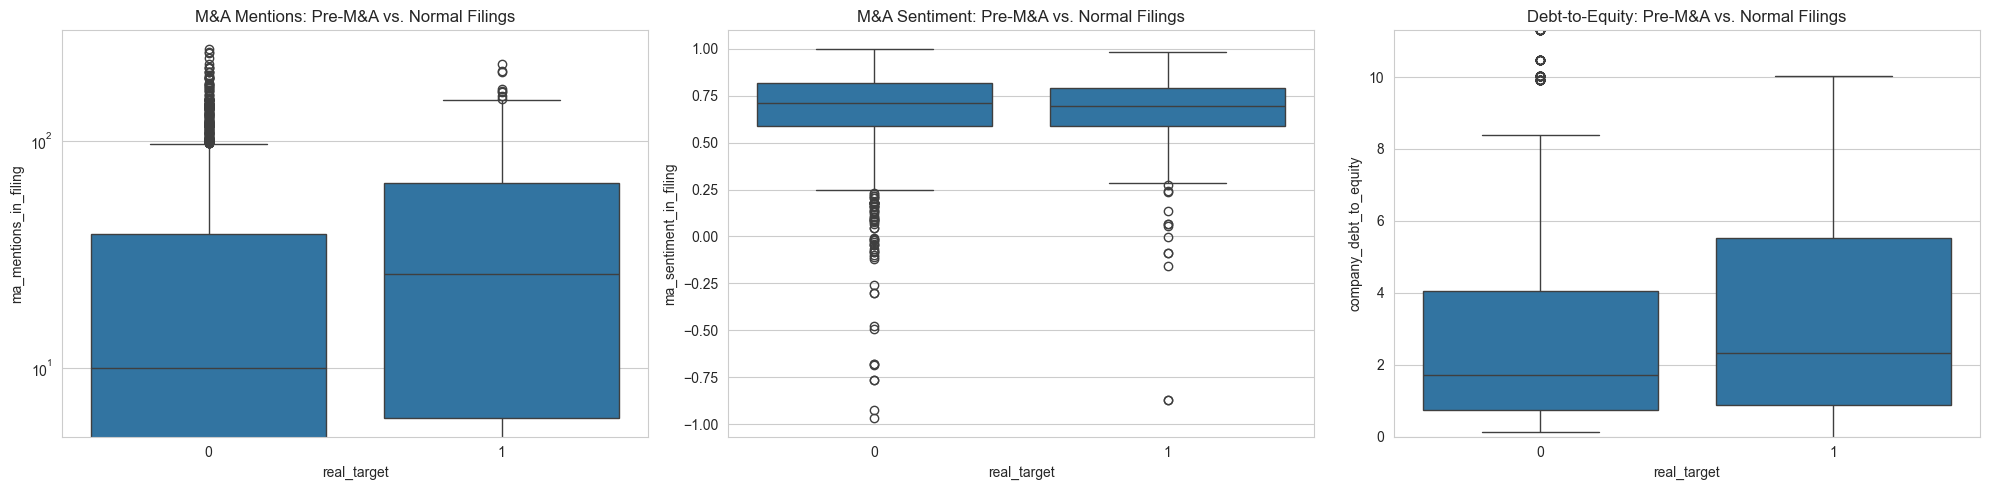

Insight: The plots suggest that filings preceding an M&A event tend to have more M&A mentions.


In [ ]:
sns.set_style('whitegrid')

plt.figure(figsize=(6, 4))
sns.countplot(x='real_target', data=df)
plt.title('Class Distribution (0 = Normal Filing, 1 = Pre-M&A Filing)')
plt.show()
print("Insight: The dataset is highly imbalanced, which is expected. M&A events are rare.")

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.boxplot(x='real_target', y='ma_mentions_in_filing', data=df, ax=axes[0])
axes[0].set_title('M&A Mentions: Pre-M&A vs. Normal Filings')
axes[0].set_yscale('log')

sns.boxplot(x='real_target', y='ma_sentiment_in_filing', data=df[df['ma_mentions_in_filing'] > 0], ax=axes[1])
axes[1].set_title('M&A Sentiment: Pre-M&A vs. Normal Filings')

sns.boxplot(x='real_target', y='company_debt_to_equity', data=df, ax=axes[2])
axes[2].set_title('Debt-to-Equity: Pre-M&A vs. Normal Filings')
axes[2].set_ylim(0, df['company_debt_to_equity'].quantile(0.95))

plt.tight_layout()
plt.show()
print("Insight: The plots suggest that filings preceding an M&A event tend to have more M&A mentions.")

## 3. Final Preprocessing for Modeling

The dataset is now labeled and explored. The final steps of selecting features and splitting the data are performed in the next notebook, `Deliverable_2_Advanced_Modeling_and_Pipelines.ipynb`, to ensure it is a self-contained script.

               EXPLORATORY DATA ANALYSIS (EDA) SUMMARY DASHBOARD

--- 1. Dataset Overview & Class Balance ---

Total Filings Analyzed: 2758
Normal Filings (Class 0): 2449
Pre-M&A Filings (Class 1): 309 (11.20%)


C:\Users\Rishab\AppData\Local\Temp\ipykernel_24812\1842114393.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='real_target', data=df, palette='pastel')


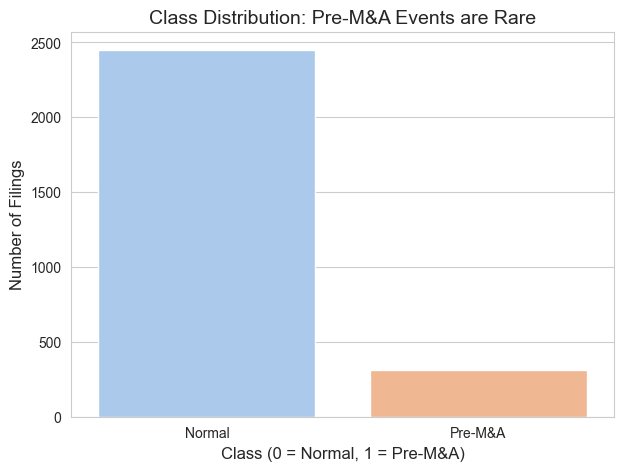



--- 2. Analysis of Key Textual Features ---



C:\Users\Rishab\AppData\Local\Temp\ipykernel_24812\1842114393.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='real_target', y='ma_mentions_in_filing', data=df, ax=axes[0], palette='viridis', showfliers=False) # Hide outliers for clarity
C:\Users\Rishab\AppData\Local\Temp\ipykernel_24812\1842114393.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Normal', 'Pre-M&A'])
C:\Users\Rishab\AppData\Local\Temp\ipykernel_24812\1842114393.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='real_target', y='ma_sentiment_in_filing', data=sentiment_df, ax=axes[1], palette='plas

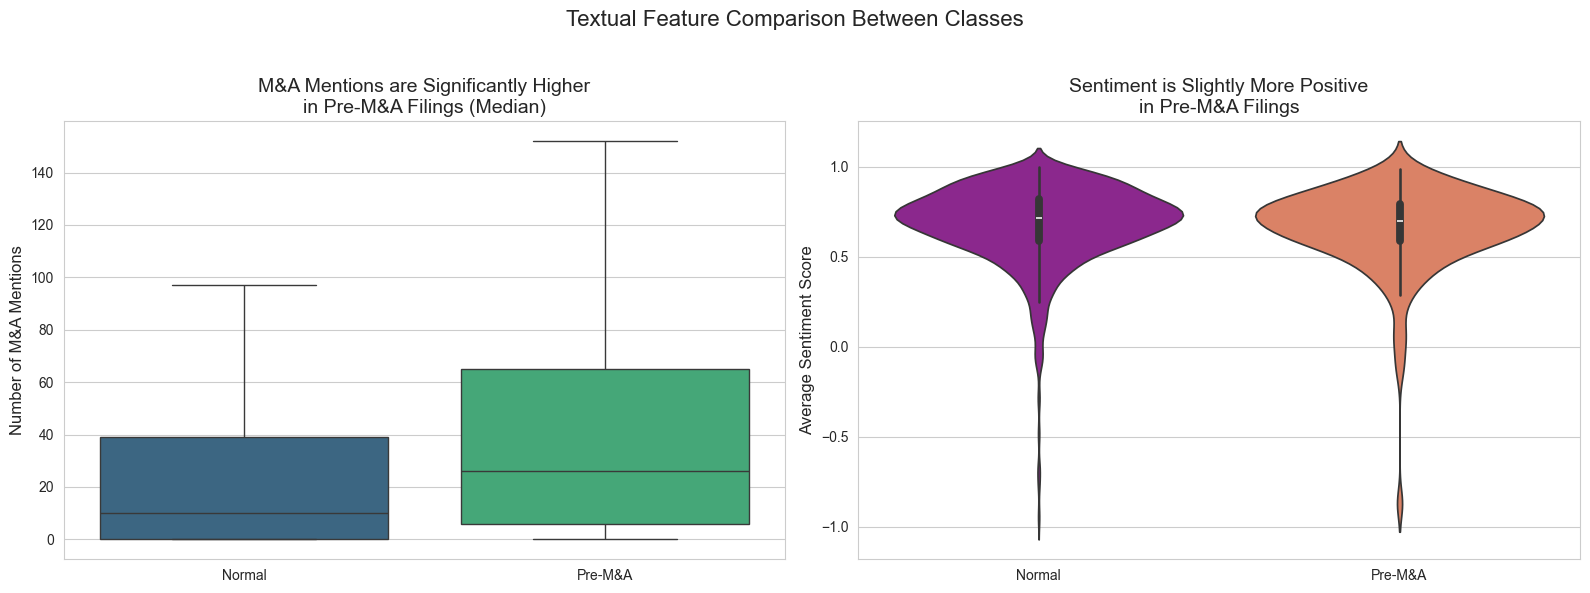

Average M&A Mentions in Normal Filings: 26.96
Average M&A Mentions in Pre-M&A Filings: 40.94

**Inference:** On average, filings in the year before an M&A event contain significantly more M&A-related keywords. This validates `ma_mentions_in_filing` as a strong predictive feature.


--- 3. Analysis of Key Financial Features ---



C:\Users\Rishab\AppData\Local\Temp\ipykernel_24812\1842114393.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='real_target', y='company_current_ratio', data=df, ax=axes[0], palette='magma', showfliers=False)
C:\Users\Rishab\AppData\Local\Temp\ipykernel_24812\1842114393.py:76: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Normal', 'Pre-M&A'])
C:\Users\Rishab\AppData\Local\Temp\ipykernel_24812\1842114393.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='real_target', y='company_debt_to_equity', data=df, ax=axes[1], palette='cividis', showfliers=False)
C:\Users\Rishab\App

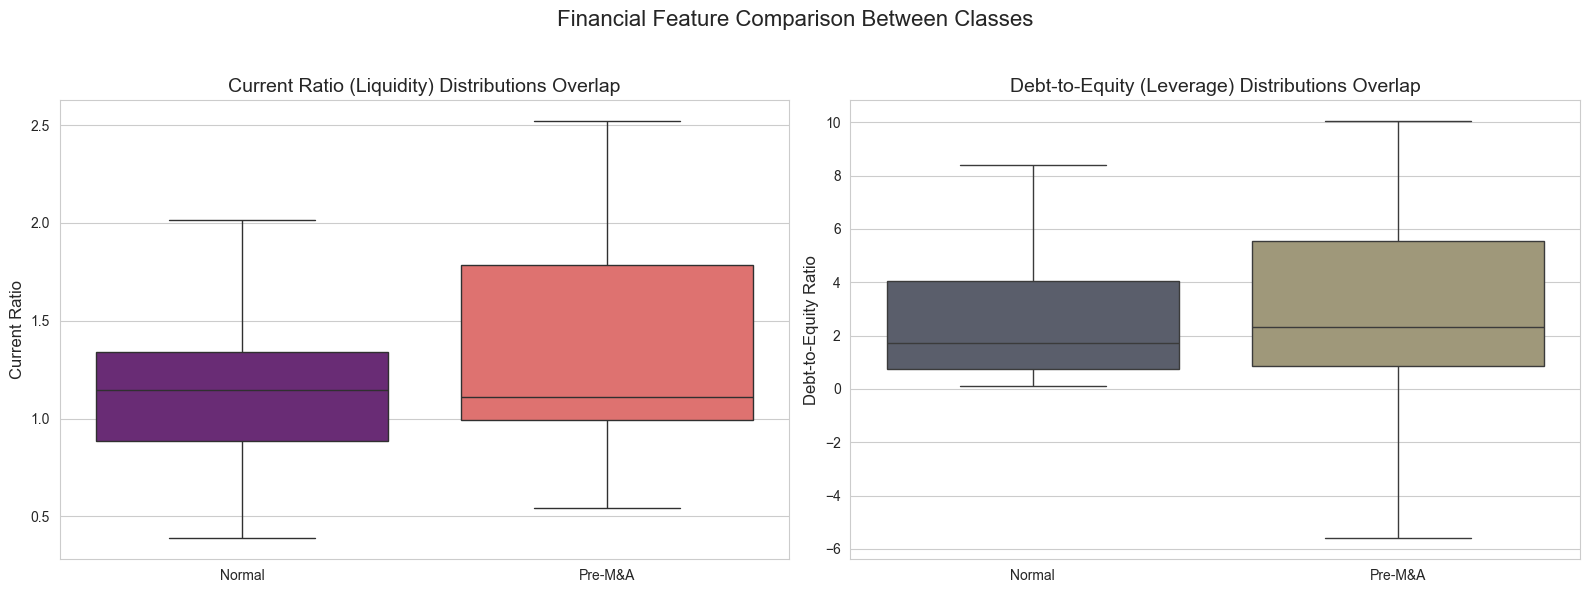


**Inference:** Unlike the textual features, the financial ratios do not show a clear separation between the two classes on their own. The distributions are very similar. This suggests that while financial health may be a contributing factor, it is not a primary indicator of an impending M&A event in this dataset. A machine learning model will be required to find any subtle, interactive patterns.


In [ ]:
print("="*80)
print(" " * 15 + "EXPLORATORY DATA ANALYSIS (EDA) SUMMARY DASHBOARD")
print("="*80)

if 'real_target' not in df.columns:
    print("\n'real_target' column not found. Please ensure the labeling cell has been run.")
else:
    print("\n--- 1. Dataset Overview & Class Balance ---\n")
    
    total_filings = len(df)
    positive_filings = df['real_target'].sum()
    negative_filings = total_filings - positive_filings
    positive_percentage = (positive_filings / total_filings) * 100
    
    print(f"Total Filings Analyzed: {total_filings}")
    print(f"Normal Filings (Class 0): {negative_filings}")
    print(f"Pre-M&A Filings (Class 1): {positive_filings} ({positive_percentage:.2f}%)")

    plt.figure(figsize=(7, 5))
    sns.countplot(x='real_target', data=df, palette='pastel')
    plt.title('Class Distribution: Pre-M&A Events are Rare', fontsize=14)
    plt.xlabel('Class (0 = Normal, 1 = Pre-M&A)', fontsize=12)
    plt.ylabel('Number of Filings', fontsize=12)
    plt.xticks([0, 1], ['Normal', 'Pre-M&A'])
    plt.show()
    
    print("\n" + "="*80)

    print("\n--- 2. Analysis of Key Textual Features ---\n")
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle('Textual Feature Comparison Between Classes', fontsize=16)

    sns.boxplot(x='real_target', y='ma_mentions_in_filing', data=df, ax=axes[0], palette='viridis', showfliers=False) # Hide outliers for clarity
    axes[0].set_title('M&A Mentions are Significantly Higher\nin Pre-M&A Filings (Median)', fontsize=14)
    axes[0].set_xticklabels(['Normal', 'Pre-M&A'])
    axes[0].set_xlabel('')
    axes[0].set_ylabel('Number of M&A Mentions', fontsize=12)
    
    sentiment_df = df[df['ma_mentions_in_filing'] > 0]
    sns.violinplot(x='real_target', y='ma_sentiment_in_filing', data=sentiment_df, ax=axes[1], palette='plasma')
    axes[1].set_title('Sentiment is Slightly More Positive\nin Pre-M&A Filings', fontsize=14)
    axes[1].set_xticklabels(['Normal', 'Pre-M&A'])
    axes[1].set_xlabel('')
    axes[1].set_ylabel('Average Sentiment Score', fontsize=12)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
    
    avg_mentions_normal = df[df['real_target'] == 0]['ma_mentions_in_filing'].mean()
    avg_mentions_pre_ma = df[df['real_target'] == 1]['ma_mentions_in_filing'].mean()
    print(f"Average M&A Mentions in Normal Filings: {avg_mentions_normal:.2f}")
    print(f"Average M&A Mentions in Pre-M&A Filings: {avg_mentions_pre_ma:.2f}")
    print("\n**Inference:** On average, filings in the year before an M&A event contain significantly more M&A-related keywords. This validates `ma_mentions_in_filing` as a strong predictive feature.")
    
    print("\n" + "="*80)
    
    print("\n--- 3. Analysis of Key Financial Features ---\n")

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle('Financial Feature Comparison Between Classes', fontsize=16)

    #Current Ratio
    sns.boxplot(x='real_target', y='company_current_ratio', data=df, ax=axes[0], palette='magma', showfliers=False)
    axes[0].set_title('Current Ratio (Liquidity) Distributions Overlap', fontsize=14)
    axes[0].set_xticklabels(['Normal', 'Pre-M&A'])
    axes[0].set_xlabel('')
    axes[0].set_ylabel('Current Ratio', fontsize=12)
    
    #Debt-to-Equity
    sns.boxplot(x='real_target', y='company_debt_to_equity', data=df, ax=axes[1], palette='cividis', showfliers=False)
    axes[1].set_title('Debt-to-Equity (Leverage) Distributions Overlap', fontsize=14)
    axes[1].set_xticklabels(['Normal', 'Pre-M&A'])
    axes[1].set_xlabel('')
    axes[1].set_ylabel('Debt-to-Equity Ratio', fontsize=12)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
    
    print("\n**Inference:** Unlike the textual features, the financial ratios do not show a clear separation between the two classes on their own. The distributions are very similar. This suggests that while financial health may be a contributing factor, it is not a primary indicator of an impending M&A event in this dataset. A machine learning model will be required to find any subtle, interactive patterns.")